<a href="https://colab.research.google.com/github/tamil1208/new-coding-bot/blob/main/NFLIX_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Loading Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/iit patna/customer churn NFLIX/NFLX (2).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.duplicated().sum()

np.int64(0)

#Data Cleaning

In [ ]:
df.drop(columns=['Date'], inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


#EDA

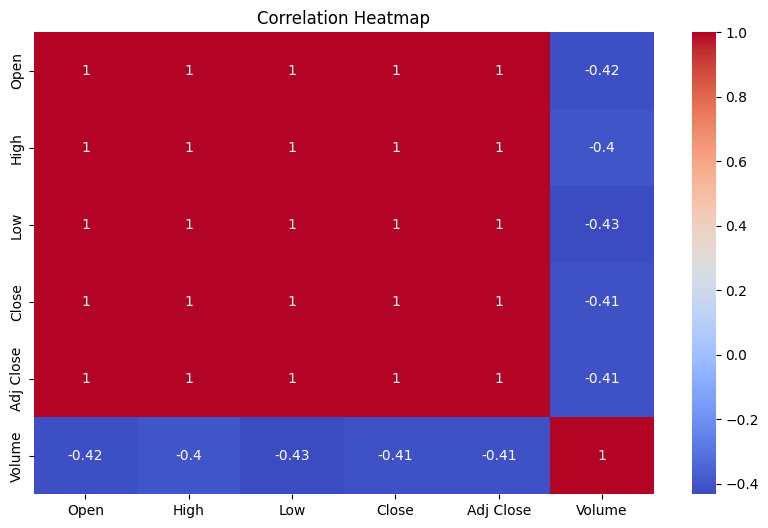

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

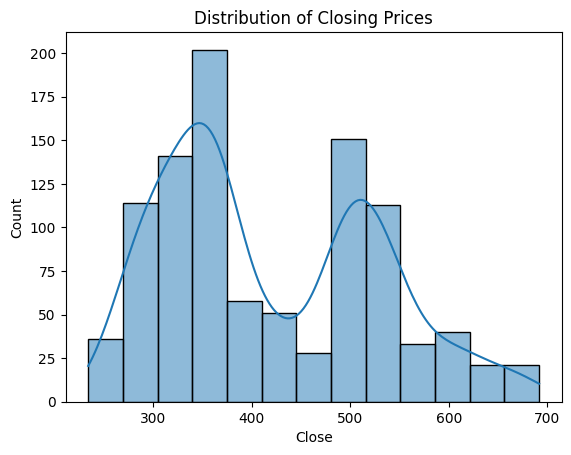

In [ ]:
# Distribution of Close prices
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

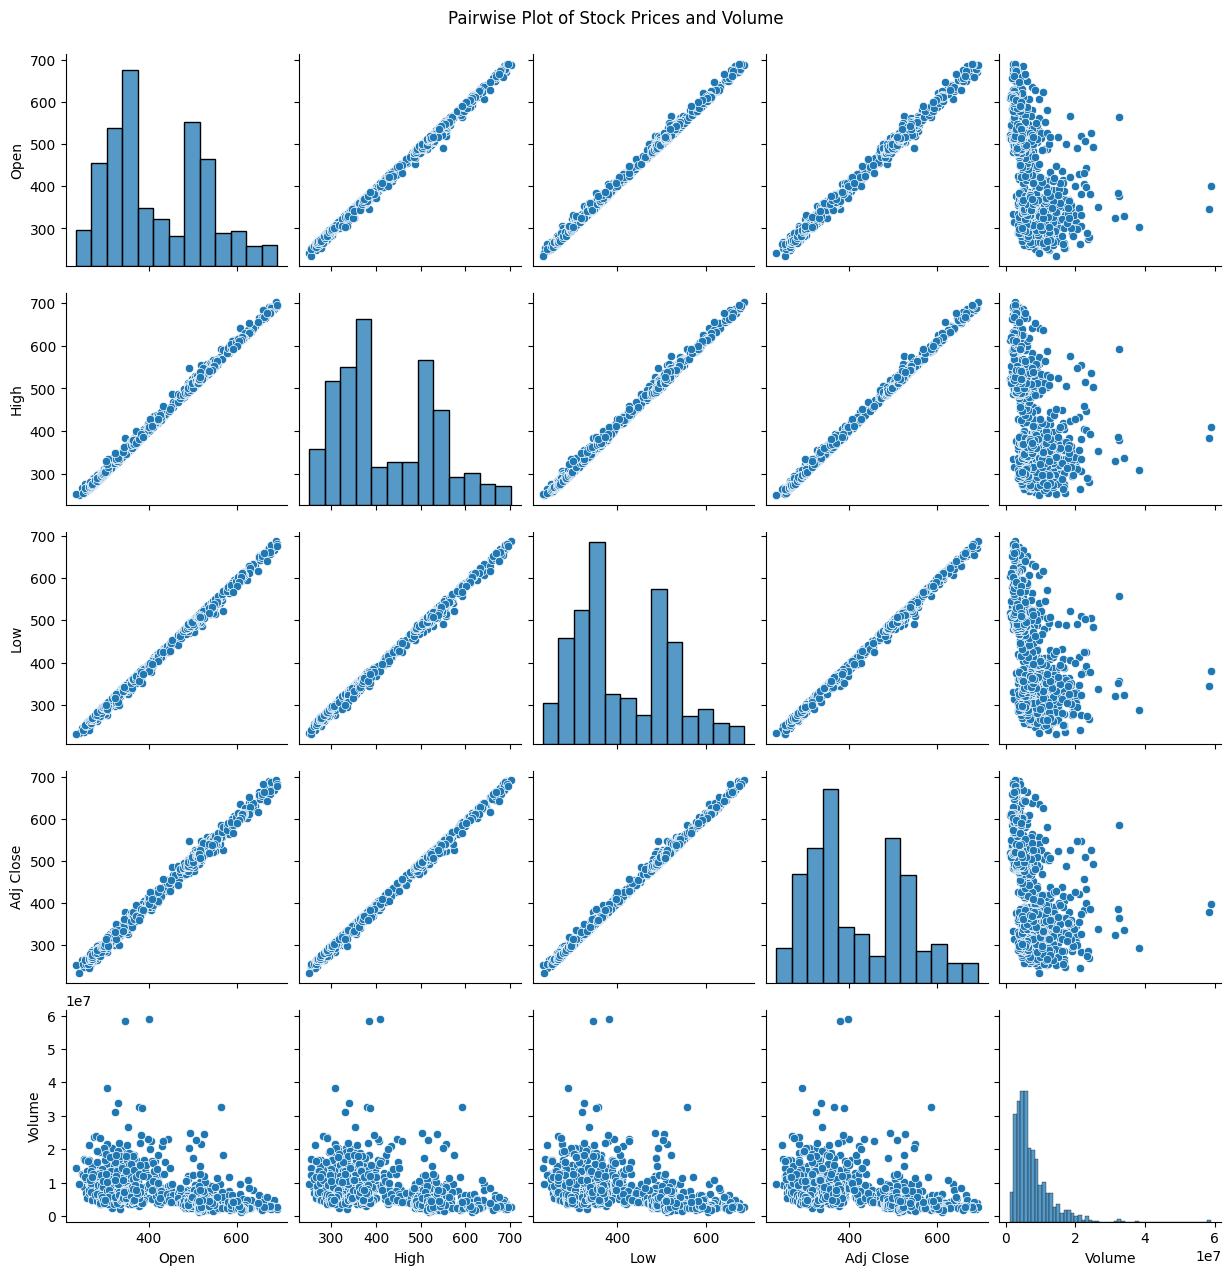

In [ ]:
sns.pairplot(df[['Open', 'High', 'Low', 'Adj Close', 'Volume']])
plt.suptitle('Pairwise Plot of Stock Prices and Volume', y=1.02)
plt.show()

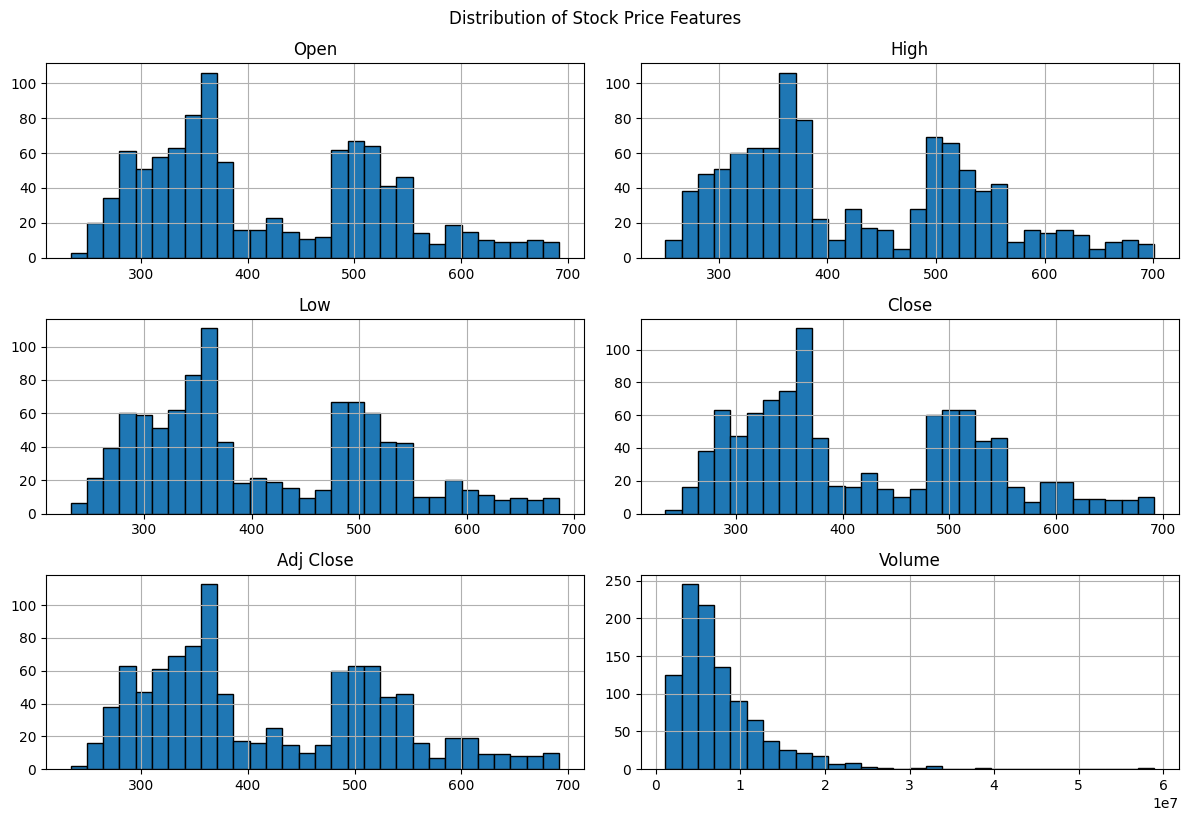

In [ ]:
df.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.suptitle('Distribution of Stock Price Features', y=1.02)
plt.show()

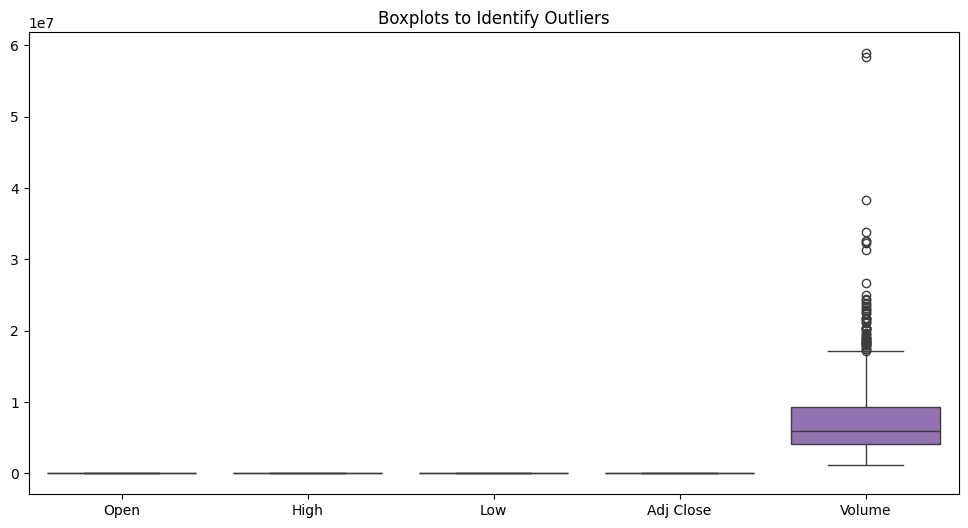

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Adj Close', 'Volume']])
plt.title('Boxplots to Identify Outliers')
plt.show()

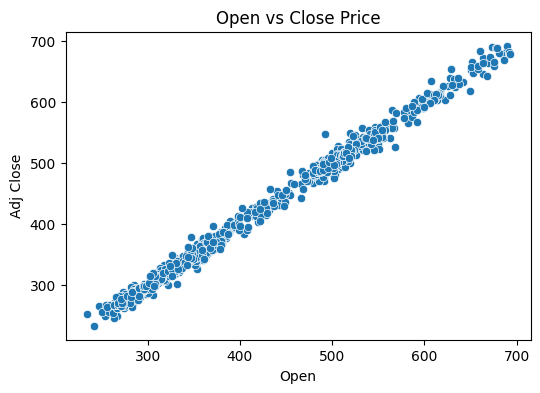

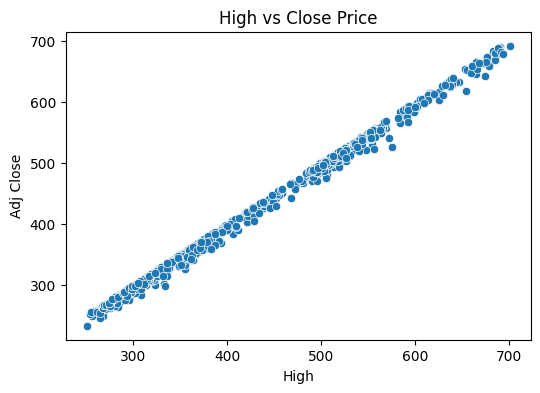

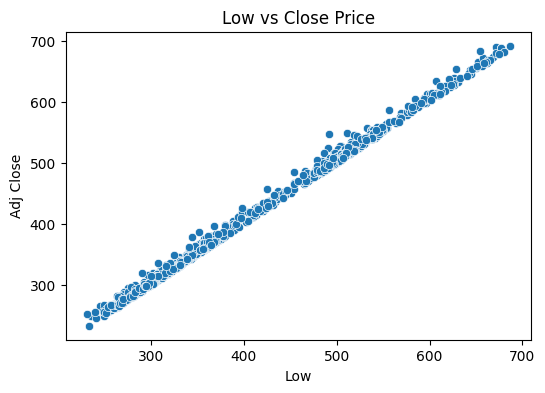

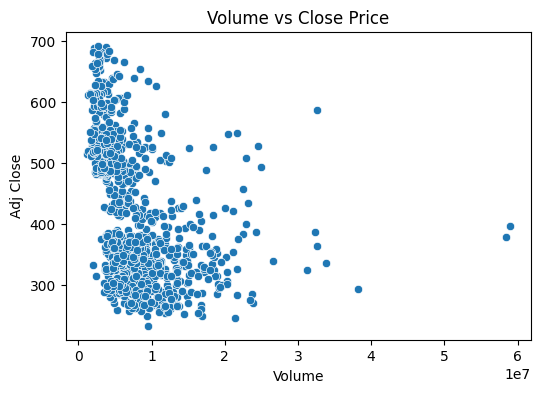

In [ ]:
features = ['Open', 'High', 'Low', 'Volume']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Adj Close'])
    plt.title(f'{feature} vs Close Price')
    plt.xlabel(feature)
    plt.ylabel('Adj Close')
    plt.show()

#  Feature Selection

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Open,High,Low,Volume
29,315.799988,317.000000,307.339996,9925200
280,366.399994,366.959991,356.799988,7541400
507,373.750000,378.109985,369.720001,4772900
706,490.459991,491.149994,475.839996,5416600
877,512.690002,519.789978,510.959991,2534900
...,...,...,...,...
106,415.950012,419.119995,411.100006,11127500
270,351.459991,356.170013,348.250000,5937800
860,544.239990,544.640015,531.659973,2722500
435,278.049988,285.750000,277.350006,6248400


In [ ]:
X_test

,Open,High,Low,Volume
628,498.649994,510.440002,498.649994,5608000
631,505.450012,508.290009,486.679993,5910300
741,507.350006,514.500000,499.579987,4177400
514,385.329987,387.320007,377.899994,3930100
365,323.399994,325.850006,314.230011,16302500
...,...,...,...,...
780,512.500000,526.510010,506.589996,3981700
334,354.380005,357.880005,348.709991,5020100
210,288.130005,295.739990,274.720001,12800600
350,363.200012,370.850006,363.200012,4138600


In [ ]:
y_train

,Adj Close
29,313.480011
280,358.779999
507,373.690002
706,476.619995
877,517.570007
...,...
106,418.970001
270,354.299988
860,535.960022
435,281.859985


In [ ]:
y_test

,Adj Close
628,509.640015
631,494.730011
741,500.859985
514,380.070007
365,315.100006
...,...
780,518.020020
334,355.730011
210,275.329987
350,370.019989


# Model Building

### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Decision Tree

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#Model Evaluation

### Linear Regression

In [ ]:
y_pred_lr = lr.predict(X_test)
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Results:
MAE: 2.857186533250912
RMSE: 3.997117223317604
R2 Score: 0.9986297713881204


### Decision Tree

In [ ]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree Results:
MAE: 4.9719312623762395
RMSE: 7.0980639428029795
R2 Score: 0.9956790516347547


### Random Forest

In [ ]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Results:
MAE: 3.7096233236633944
RMSE: 5.264277655068572
R2 Score: 0.9976232864811463


# Performance Comparison Plot

In [ ]:
# Lets  Collect metrics to print the plot

In [ ]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
}

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df

,Model,MAE,RMSE,R2 Score
0,Linear Regression,2.857187,3.997117,0.998630
1,Decision Tree,4.971931,7.098064,0.995679
2,Random Forest,3.709623,5.264278,0.997623


In [ ]:
# now plotting

<ipython-input-39-527458567>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-39-527458567>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-39-527458567>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


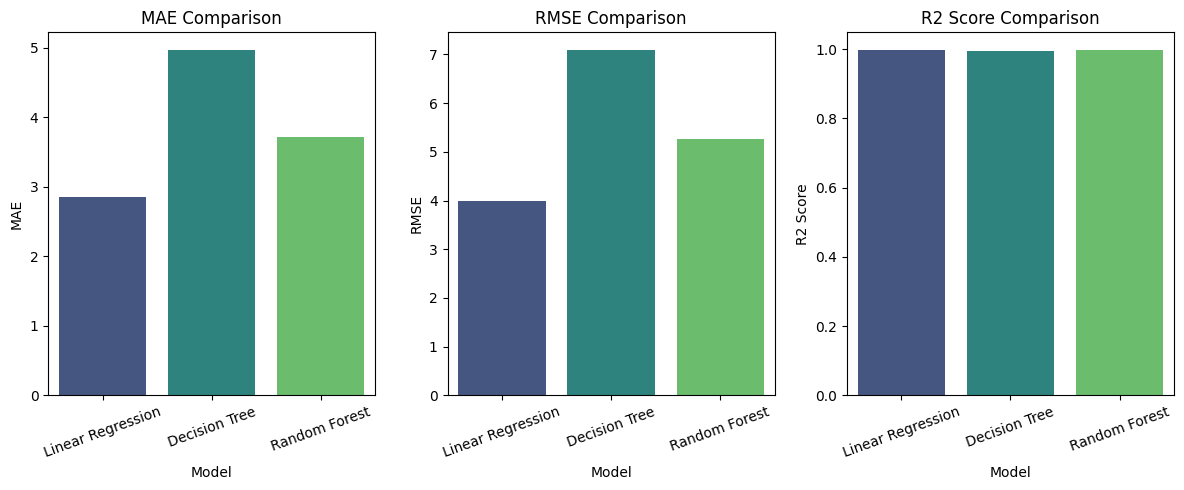

In [ ]:
plt.figure(figsize=(12, 5))
metrics = ['MAE', 'RMSE', 'R2 Score']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.xticks(rotation=20)
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()

 # Best Model: Linear Regression

Because :

1. Lowest MAE (mean absolute error): 2.857 → better short-term accuracy

2. Lowest RMSE (root mean squared error): 3.997 → better at penalizing large errors
3. Highest R² Score: 0.9986 → explains 99.86% of the variance in the Close price



Despite being the simplest model, Linear Regression performed best overall on our data.